In [149]:
import torch
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
def sigmoid(x):
    '''
    Sigmoid activation function 
    return x object tensor.Tensor
    '''
    return 1/(1+torch.exp(-x))

In [64]:
torch.manual_seed(7) # random seed

features = torch.randn(1,3)
weights = torch.randn_like(features)
bias = torch.randn(1,1)

n_input = features.shape[1]
n_hidden = 2
n_output = 1

w1 = torch.randn(n_input,n_hidden)
w2 = torch.randn(n_hidden,n_output)

b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [65]:
features.shape

torch.Size([1, 3])

$ y = \sigma(W^TX + b) $

Testing out reshaping the matrix 

Better to not use **reshape** as sometimes it copies the data into another part of the memory.
**resize_** performs an inplace operation on the same variable and if the new shape is less the older data is not removed from the memory location, if the new shape is more than the older data some parts would have uninitialized values. 
view is a better option as it would return the data reshaped and will take the same memory location to save space. 

In [66]:
sigmoid(torch.mm(features,weights.view(3,1)) + bias)

tensor([[0.5720]])

In [67]:
h = sigmoid(torch.mm(features,w1) + b1)
output = sigmoid(torch.mm(h,w2) + b2)
print(output) 

tensor([[0.8371]])


In [72]:

a = np.random.randn(4,5)

In [73]:
b = torch.from_numpy(a)

In [74]:
b

tensor([[ 0.0156,  0.7535, -1.1550, -0.5861, -0.4384],
        [ 0.6311,  0.6647, -0.2380, -0.1670, -0.3565],
        [ 0.6042,  0.8750,  1.1624,  1.6485, -0.3822],
        [-2.2467, -0.8893,  1.0070, -0.9340, -0.1267]], dtype=torch.float64)

In [75]:
b.numpy()

array([[ 0.01562847,  0.75348791, -1.15501931, -0.5861146 , -0.43843942],
       [ 0.6311309 ,  0.66471633, -0.23800402, -0.16700245, -0.35652653],
       [ 0.60419477,  0.87499385,  1.16241269,  1.64852504, -0.38219743],
       [-2.24673224, -0.88926795,  1.00697215, -0.93398522, -0.12669909]])

In [76]:
b.mul_(2)

tensor([[ 0.0313,  1.5070, -2.3100, -1.1722, -0.8769],
        [ 1.2623,  1.3294, -0.4760, -0.3340, -0.7131],
        [ 1.2084,  1.7500,  2.3248,  3.2971, -0.7644],
        [-4.4935, -1.7785,  2.0139, -1.8680, -0.2534]], dtype=torch.float64)

In [77]:
a

array([[ 0.03125695,  1.50697581, -2.31003862, -1.17222921, -0.87687885],
       [ 1.26226179,  1.32943266, -0.47600803, -0.33400489, -0.71305305],
       [ 1.20838955,  1.74998769,  2.32482537,  3.29705007, -0.76439486],
       [-4.49346449, -1.7785359 ,  2.01394429, -1.86797044, -0.25339819]])

Running the MNIST via pytorch

In [78]:
from torchvision import datasets,transforms

In [134]:
#setting the batch size
batch_size = 32

trainset = datasets.MNIST('MNIST/', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

validationset = datasets.MNIST('MNIST/', 
                                    train=False, 
                                    transform=transforms.ToTensor())

trainset_loader = torch.utils.data.DataLoader(dataset=trainset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

validationset_loader = torch.utils.data.DataLoader(dataset=validationset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

In [140]:
dataiter = iter(trainset_loader)
images,labels = dataiter.next()

In [145]:
for images,labels in trainset_loader:
    print('Images :',images.size(),'type :',images.type())
    print('Labels :',labels.size(),'type :',labels.type())
    break

Images : torch.Size([32, 1, 28, 28]) type : torch.FloatTensor
Labels : torch.Size([32]) type : torch.LongTensor


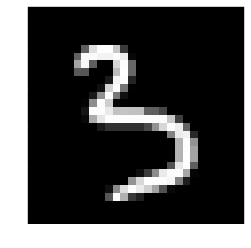

In [158]:
plt.imshow(images[0].numpy().squeeze(),cmap='gray');

In [161]:
inputs = images.view(images.shape[0],-1)

# createing the w1 and b1
w1 = torch.randn(28*28,256) 
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = sigmoid(torch.mm(inputs,w1) + b1)

out = torch.mm(h,w2) + b2
print(out)

tensor([[ 2.1042e+01, -2.3047e+01,  1.1772e+01,  2.4628e+01,  4.0001e+00,
         -1.0738e+01, -2.0111e+01,  1.1074e+01, -5.7207e+00, -1.7006e+00],
        [ 2.1733e+01, -2.9891e+00, -2.1630e+00,  1.4917e+01,  5.9713e+00,
         -2.4532e+01, -4.4692e+00,  1.3889e+01, -1.1727e+00,  6.3640e+00],
        [ 2.3038e+01, -1.7967e+01,  6.9164e+00,  1.9386e+01,  1.8640e+01,
         -2.9081e+01,  4.6402e+00,  8.8282e+00, -1.0042e+01,  5.4575e+00],
        [-1.0751e-01, -1.8057e+01,  1.6434e+01,  1.7638e+01,  1.0722e+01,
         -9.7184e+00,  5.4665e+00,  1.7169e+01, -1.2430e+01,  5.2463e+00],
        [ 9.4684e+00, -8.3443e+00,  6.3254e+00,  4.3738e+00,  2.1728e+01,
         -1.0451e+01, -1.1627e+01,  1.4773e+01, -4.6736e+00, -1.5637e+00],
        [ 1.4217e+01, -1.5185e+01, -8.2809e-01,  2.3803e+01,  1.3241e+01,
         -2.3719e+01,  5.6984e+00,  2.0591e+01, -5.9919e+00,  5.2285e+00],
        [ 1.6594e+01, -7.7942e+00,  5.2919e+00,  1.4358e+01,  6.8712e+00,
         -2.6268e+01, -5.5392e+0

In [189]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

In [196]:
probablities = softmax(out)

In [197]:
print(probablities.shape)

torch.Size([32, 10])


In [198]:
print(probablities.sum(dim=1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [200]:
from torch import nn
class Net(nn.Module):
    def __init__(self):
        super.__init__()
        
        self.hidden = nn.Linear(28*28,256)
        self.output = nn.Linear(256,10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x
        

In [236]:
import torch.nn.functional as F
class NetFunctional(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(28*28,128)
        self.hidden2 = nn.Linear(128,32)
        self.output = nn.Linear(32,10)
        
    def forward(self,x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x))
        return x 

In [246]:
model = nn.Sequential(nn.Linear(28*28,128),
                     nn.ReLU(),
                     nn.Linear(128,32),
                     nn.ReLU(),
                     nn.LogSoftmax(dim=1))

In [247]:
criterion = nn.CrossEntropyLoss()
images,labels = next(iter(trainset_loader))
images = images.view(images.shape[0],-1)
# logit = NetFunctional()
logit = model(images)

In [248]:
# loss = criterion(logit(images),labels)
loss = criterion(logit,labels)

In [250]:
print(loss)

tensor(3.4828, grad_fn=<NllLossBackward>)


In [254]:
print(model[0].weight.grad)

None


In [255]:
loss.backward()

In [256]:
print(model[0].weight.grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [258]:
from torch import optim